##Implementing Bag Of Words

**What is a bag of words in NLP?**<br><br>
A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded.<br><br>

**What is the bag of words model give example?** <br><br>
The Bag-of-words model is an orderless document representation — only the counts of words matter. For instance, in the above example "John likes to watch movies. Mary likes movies too", the bag-of-words representation will not reveal that the verb "likes" always follows a person's name in this text.

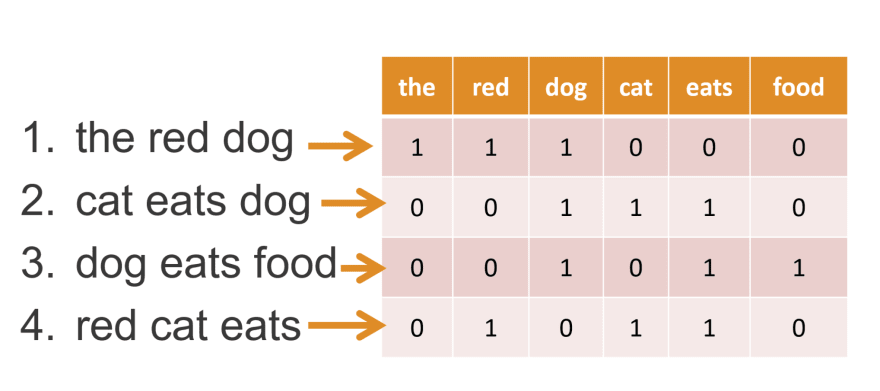

In [1]:
## Convert all strings to their lower case form.

documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
for i in documents:
    lower_case_documents.append(i.lower())
print(lower_case_documents)

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [16]:
data=pd.DataFrame(documents,columns=['text'])
data

,text
0,"Hello, how are you!"
1,"Win money, win from home."
2,Call me now.
3,"Hello, Call hello you tomorrow?"


(-0.5, 799.5, 599.5, -0.5)

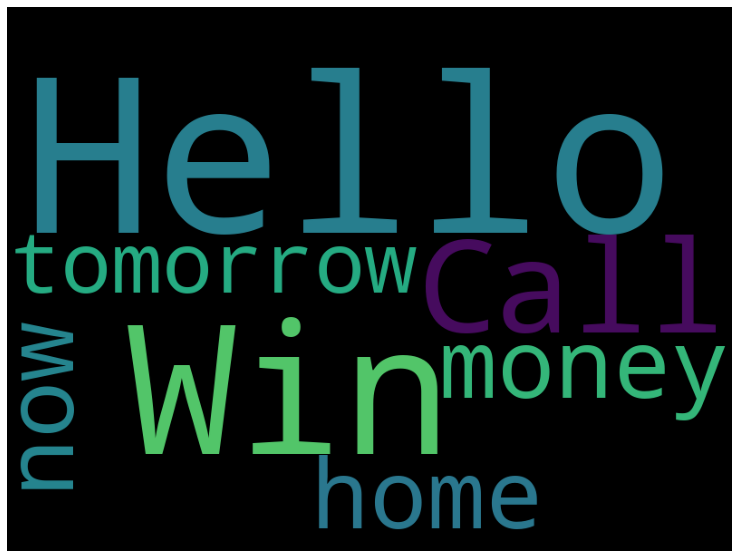

In [18]:
import matplotlib
import pylab as plt

from wordcloud import WordCloud
cloud=WordCloud(width=800, height=600).generate(" ".join(data['text'])) 
plt.figure(figsize=(16,10))
plt.imshow(cloud)
plt.axis('off')

In [5]:
## Removing all punctuations

sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(''.join(c for c in i if c not in string.punctuation))
    
print(sans_punctuation_documents)

['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


In [6]:
## Tokenization

preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split(' '))
print(preprocessed_documents)

[['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


In [7]:
## Count frequencies
frequency_list = []
import pprint
from collections import Counter

for i in preprocessed_documents:
    frequency_list.append(Counter(i))
    
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [8]:
import pandas as pd
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']

In [9]:
##Implementing Bag of Words in scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(documents)

**What is CountVectorizer in NLP?**<br><br>
CountVectorizer tokenizes(tokenization means breaking down a sentence or paragraph or any text into words) the text along with performing very basic preprocessing like removing the punctuation marks, converting all the words to lowercase, etc

In [10]:
print(count_vector)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8',
                input=['Hello, how are you!', 'Win money, win from home.',
                       'Call me now.', 'Hello, Call hello you tomorrow?'],
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [11]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

In [12]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]])

In [13]:
frequency_matrix = pd.DataFrame(doc_array,index=documents,columns=count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
"Hello, how are you!",1,0,0,1,0,1,0,0,0,0,0,1
"Win money, win from home.",0,0,1,0,1,0,0,1,0,0,2,0
Call me now.,0,1,0,0,0,0,1,0,1,0,0,0
"Hello, Call hello you tomorrow?",0,1,0,2,0,0,0,0,0,1,0,1


##**Implementing n-gram in NLP**

In [ ]:
# load in all the modules we're going to need
import nltk
import collections

# function for making ngrams
from nltk.util import ngrams 

# for reading the dataset
import pandas as pd

In [ ]:
# lets read the dataset
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')

# lets check the shape of the dataset
data.shape

(3150, 5)

In [ ]:
# lets check the head of the dataset
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# Visualizing the BiGrams

text = str(data['verified_reviews'])
tokenized = text.split()

# and get a list of all the bi-grams
esBigrams = ngrams(tokenized, 2)

# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(esBigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esBigramFreq.most_common(10)

[(('I', 'have'), 2),
 (('0', 'Love'), 1),
 (('Love', 'my'), 1),
 (('my', 'Echo!'), 1),
 (('Echo!', '1'), 1),
 (('1', 'Loved'), 1),
 (('Loved', 'it!'), 1),
 (('it!', '2'), 1),
 (('2', 'Sometimes'), 1),
 (('Sometimes', 'while'), 1)]

In [ ]:
# Visualizing the Trigrams

text = str(data['verified_reviews'])
tokenized = text.split()

# and get a list of all the bi-grams
esTrigrams = ngrams(tokenized, 3)

# get the frequency of each bigram in our corpus
esTrigramFreq = collections.Counter(esTrigrams)

# what are the ten most popular ngrams in this Spanish corpus?
esTrigramFreq.most_common(10)

[(('0', 'Love', 'my'), 1),
 (('Love', 'my', 'Echo!'), 1),
 (('my', 'Echo!', '1'), 1),
 (('Echo!', '1', 'Loved'), 1),
 (('1', 'Loved', 'it!'), 1),
 (('Loved', 'it!', '2'), 1),
 (('it!', '2', 'Sometimes'), 1),
 (('2', 'Sometimes', 'while'), 1),
 (('Sometimes', 'while', 'playing'), 1),
 (('while', 'playing', 'a'), 1)]